# Graphs

In [1]:
#imports
import networkx as nx

import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import collections
from community import community_louvain
from networkx.algorithms.community.centrality import girvan_newman
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Global variables 

DEGREE = 1

DEGREE_FILE = '../generated/map/degree_' + str(DEGREE) +'/'

def get_graph_elem_file(elem_type, leak):
    return DEGREE_FILE + leak + '_' + elem_type + '.csv'



In [61]:
def graph_leak_matches(leak):
    
    bahamas = (leak == 'bahamas')
    
    node_id = '0'
    name_index = '1'
    
    if bahamas:
        node_id = '4' 
        name_index = '7'
    
    import matplotlib.pyplot as plt
    plt.rcParams["figure.figsize"] = (25,25)
    
    nodes = pd.read_csv(get_graph_elem_file('nodes', leak), index_col=0).reset_index(drop=True)
    edges = pd.read_csv(get_graph_elem_file('edges', leak), index_col=0).reset_index(drop=True)
    
    full_df = pd.merge(nodes, edges, left_on=node_id, right_on='START_ID')
    full_df = pd.merge(full_df, nodes, left_on='END_ID', right_on=node_id)[[str(name_index) +'_x', str(name_index) +'_y']]\
                .rename(columns = {str(name_index) +'_x': 'shell_1', str(name_index) +'_y': 'shell_2'})

    graph = nx.from_pandas_edgelist(full_df, 'shell_1', 'shell_2', edge_attr=None, create_using= nx.Graph())
    print('About graph for ' + leak + ' leaks:')
    print(nx.info(graph))
    nx.draw(graph, nx.spring_layout(graph, scale=60, k=0.25), with_labels=True, alpha=0.7, node_size=1000)
    

    

About graph for panama leaks:
Name: 
Type: Graph
Number of nodes: 154
Number of edges: 119
Average degree:   1.5455


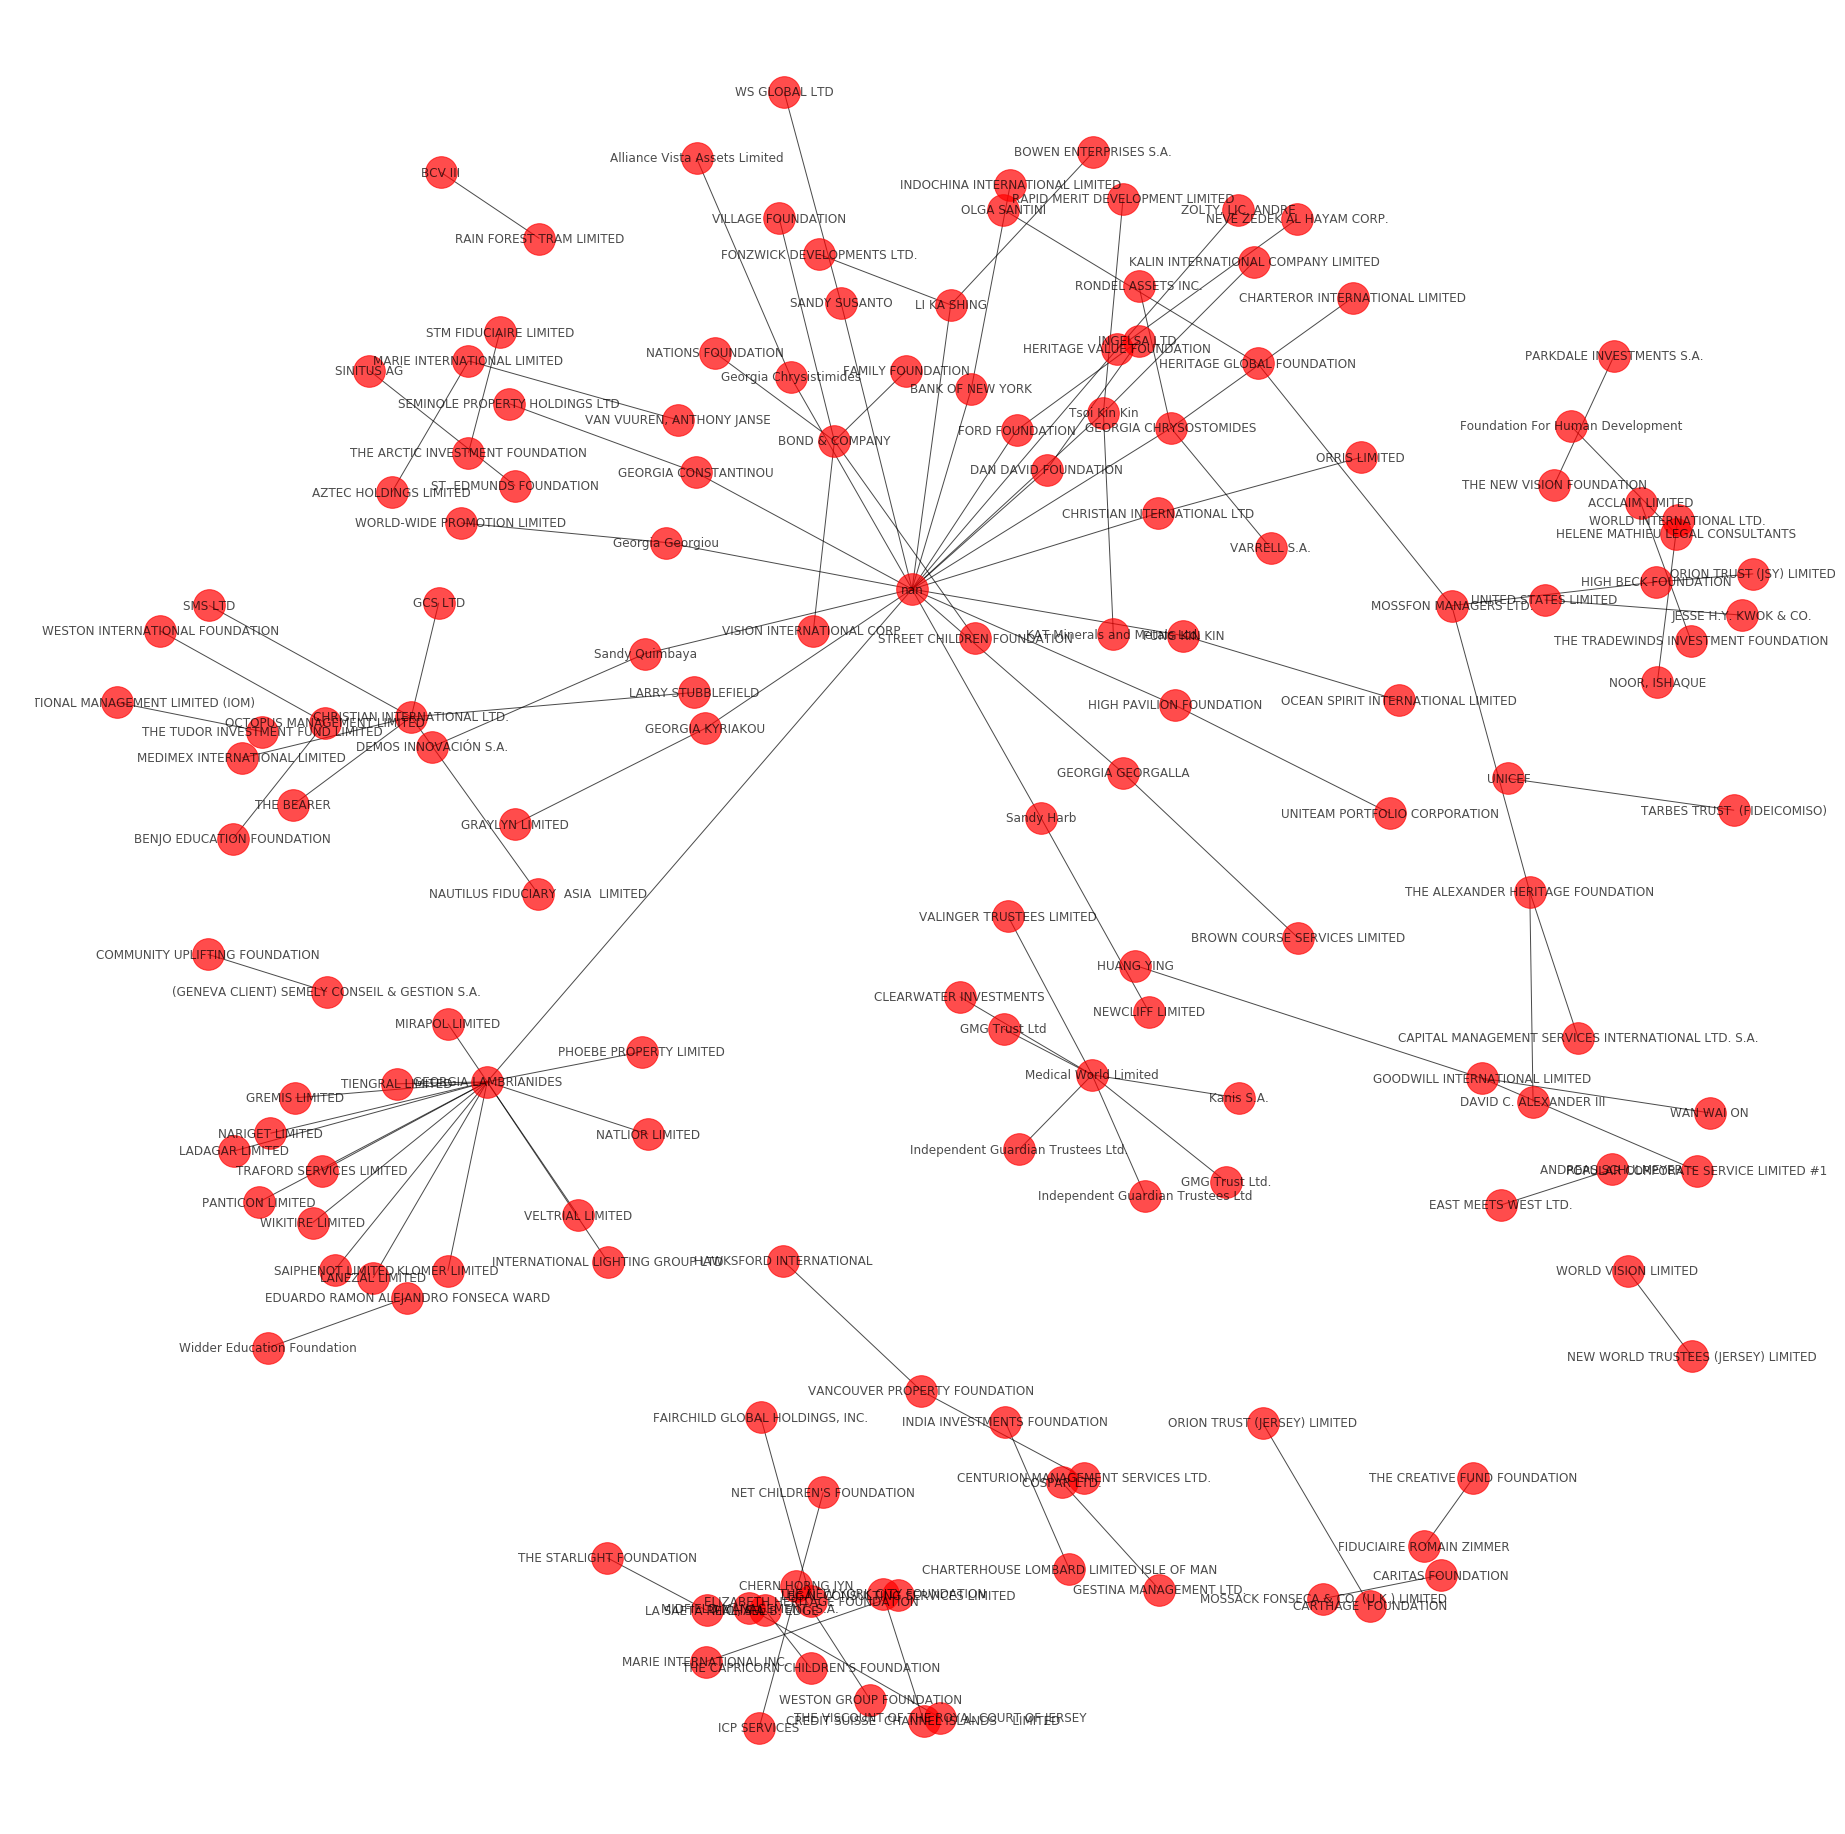

In [30]:
graph_leak_matches('panama')

About graph for paradise leaks:
Name: 
Type: Graph
Number of nodes: 554
Number of edges: 441
Average degree:   1.5921


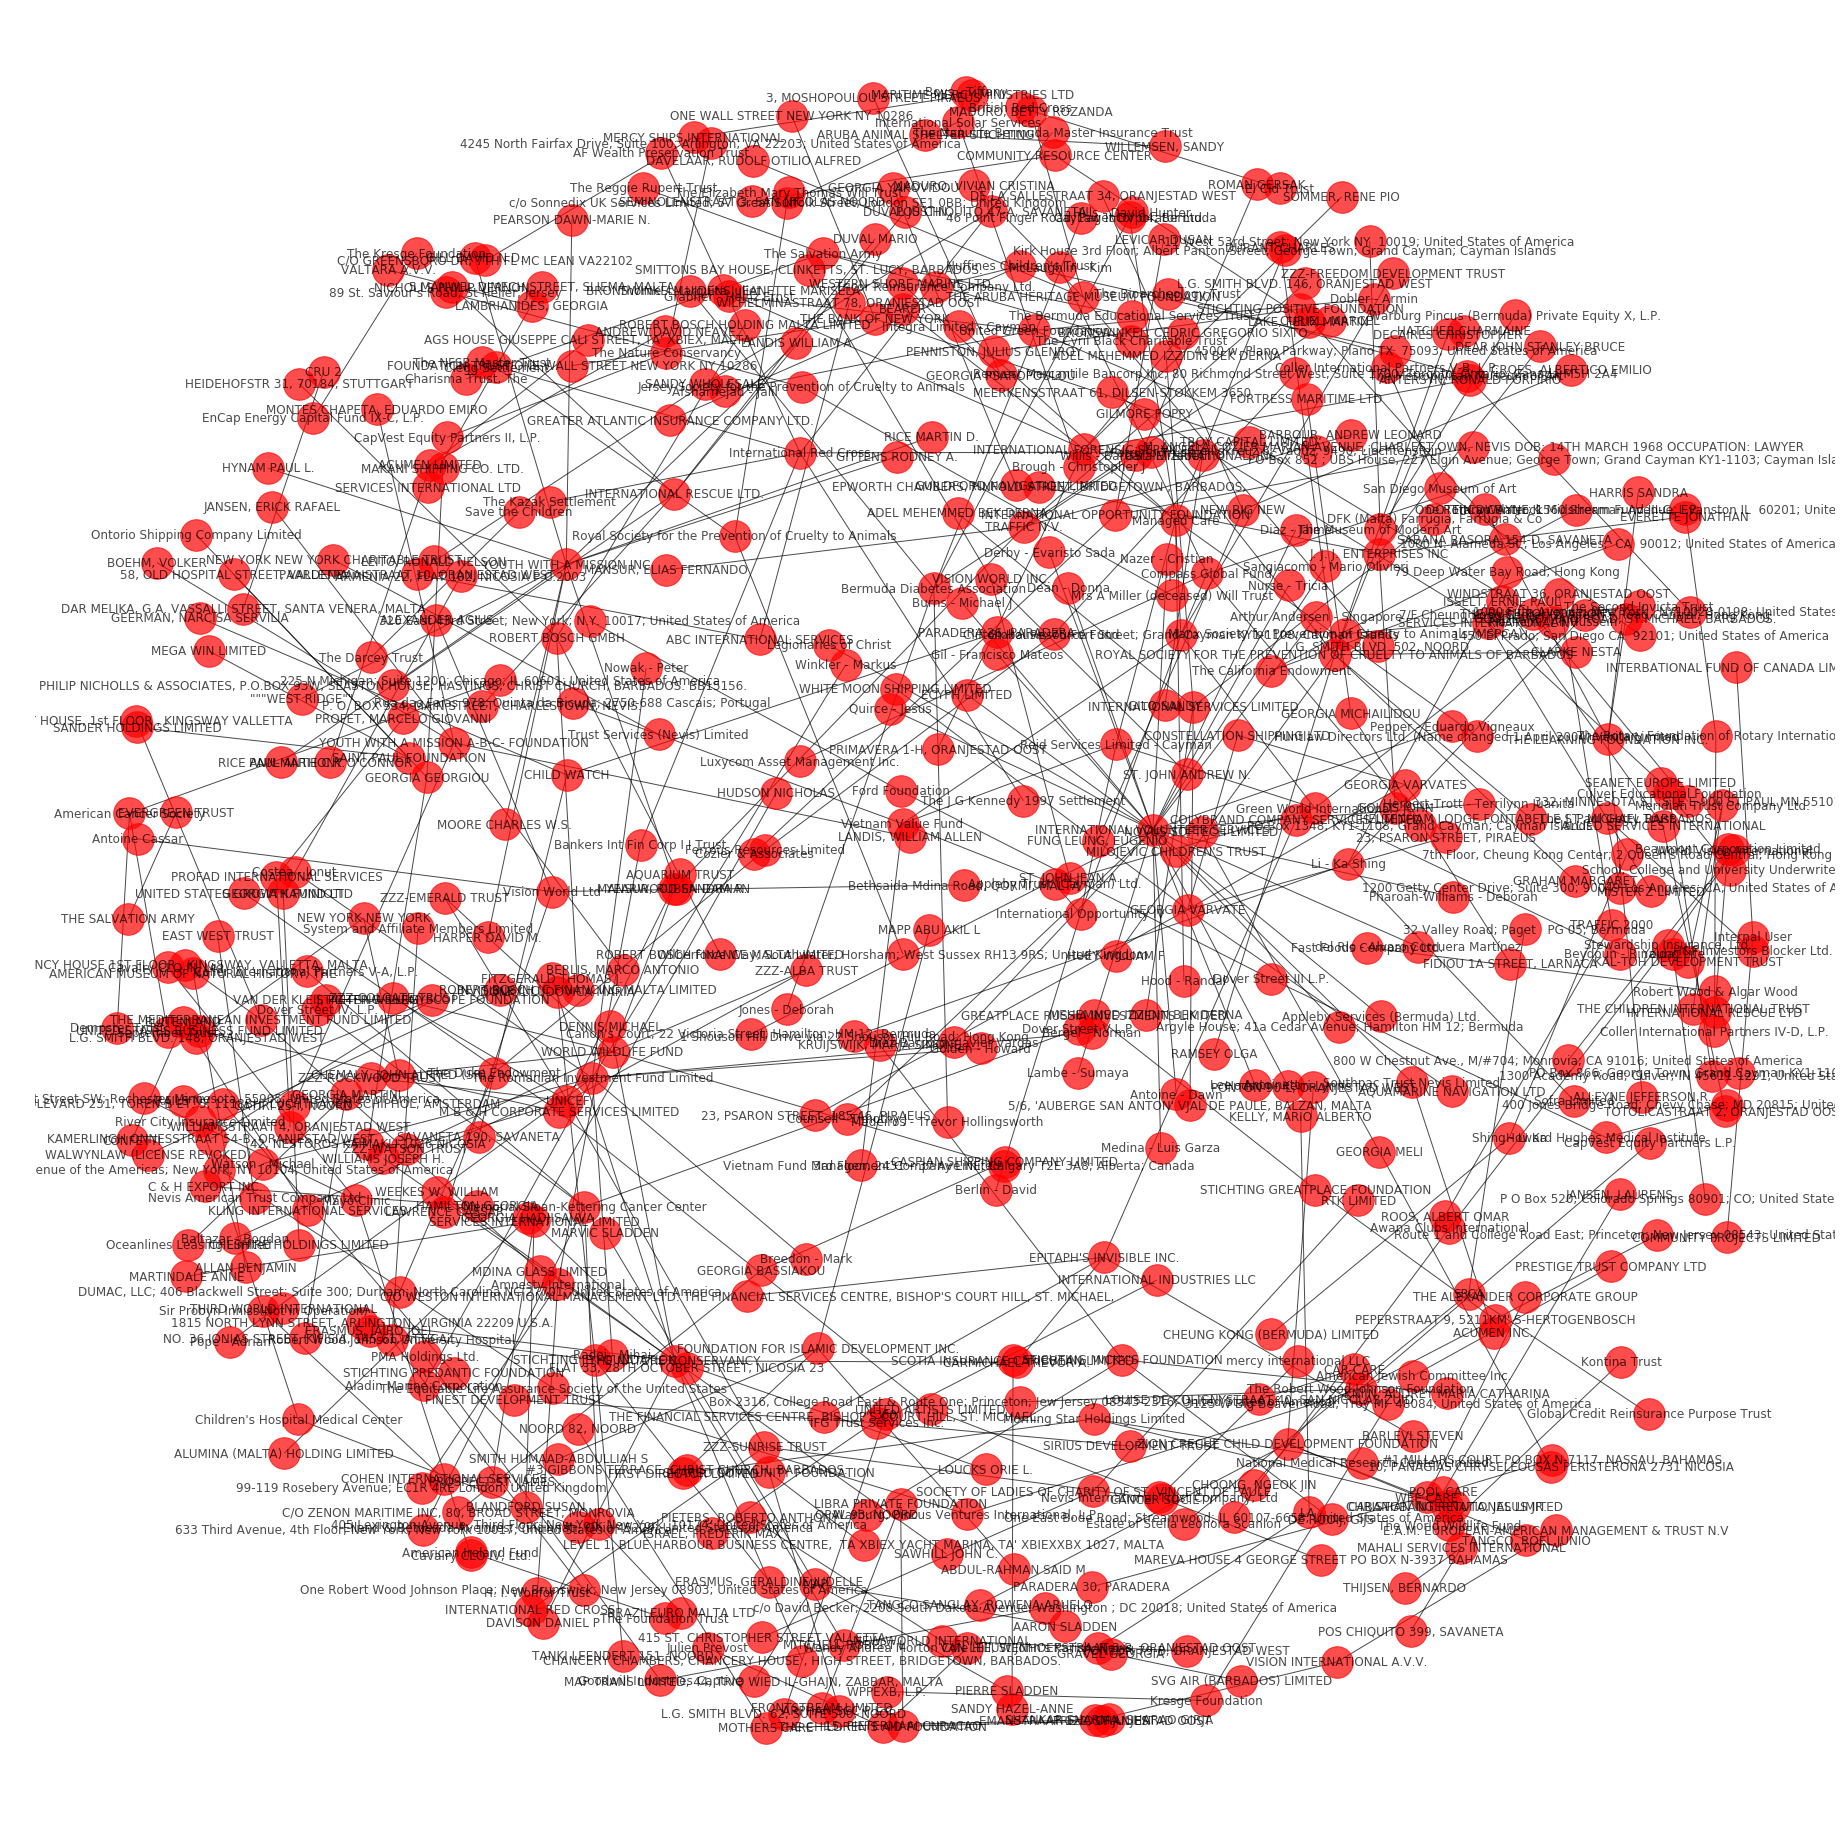

In [32]:
graph_leak_matches('paradise')

About graph for offshore leaks:
Name: 
Type: Graph
Number of nodes: 69
Number of edges: 61
Average degree:   1.7681


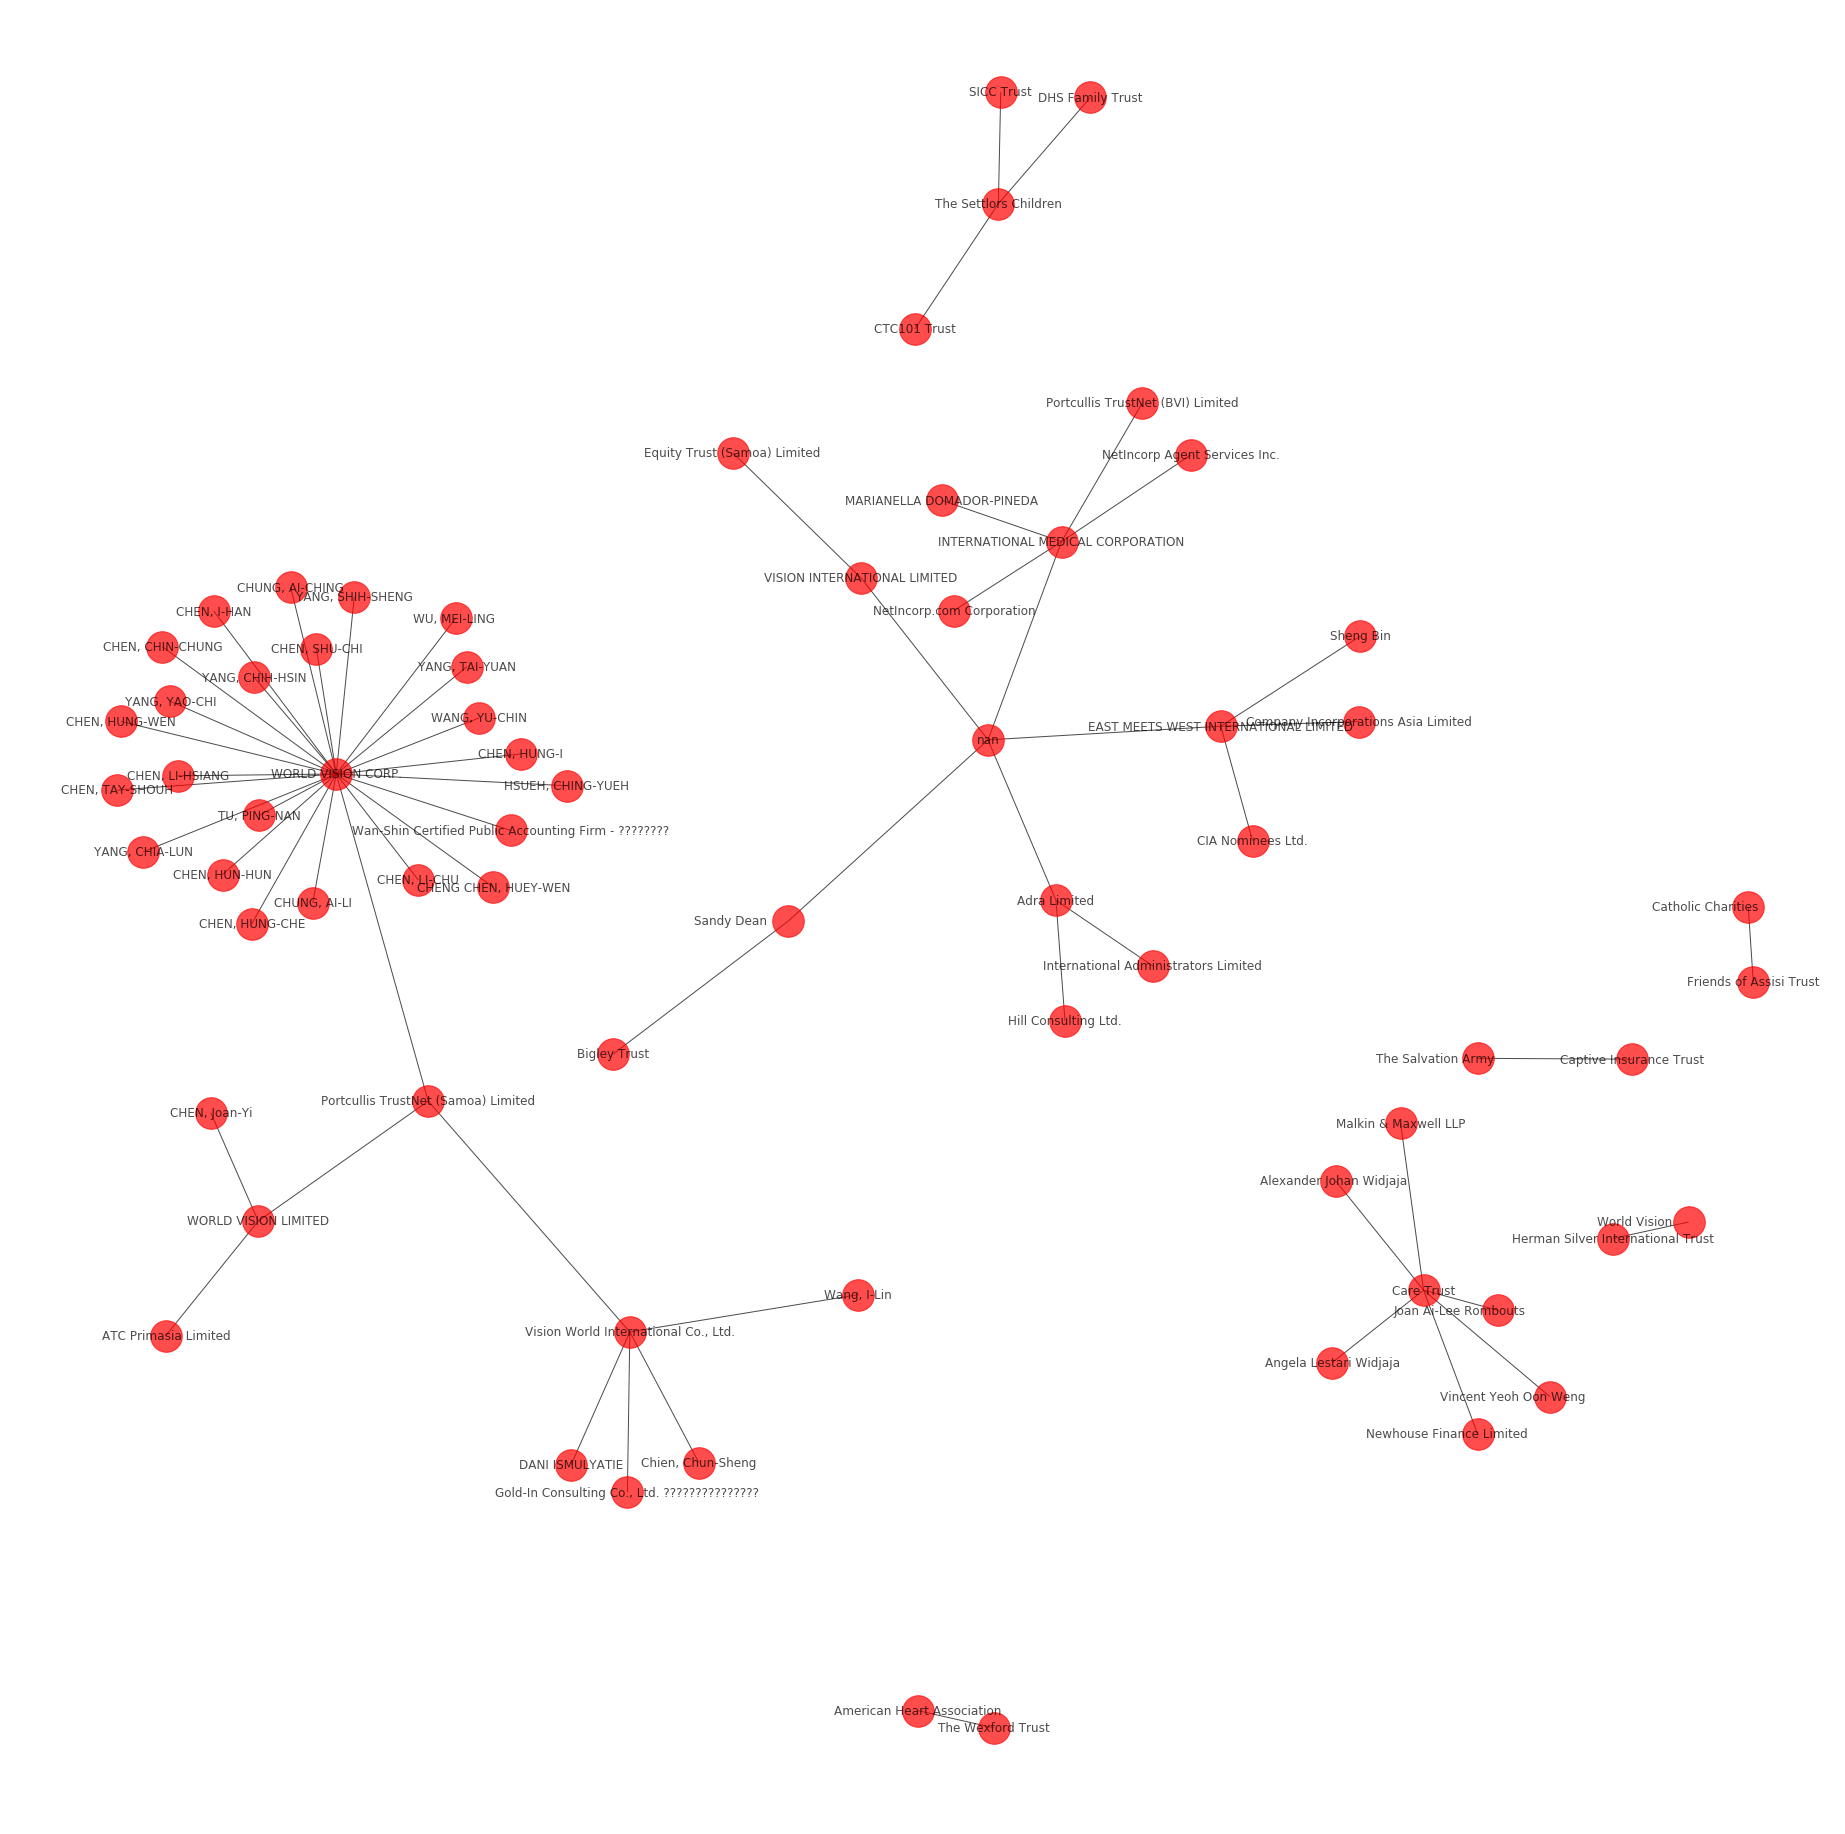

In [31]:
graph_leak_matches('offshore')

About graph for bahamas leaks:
Name: 
Type: Graph
Number of nodes: 44
Number of edges: 26
Average degree:   1.1818


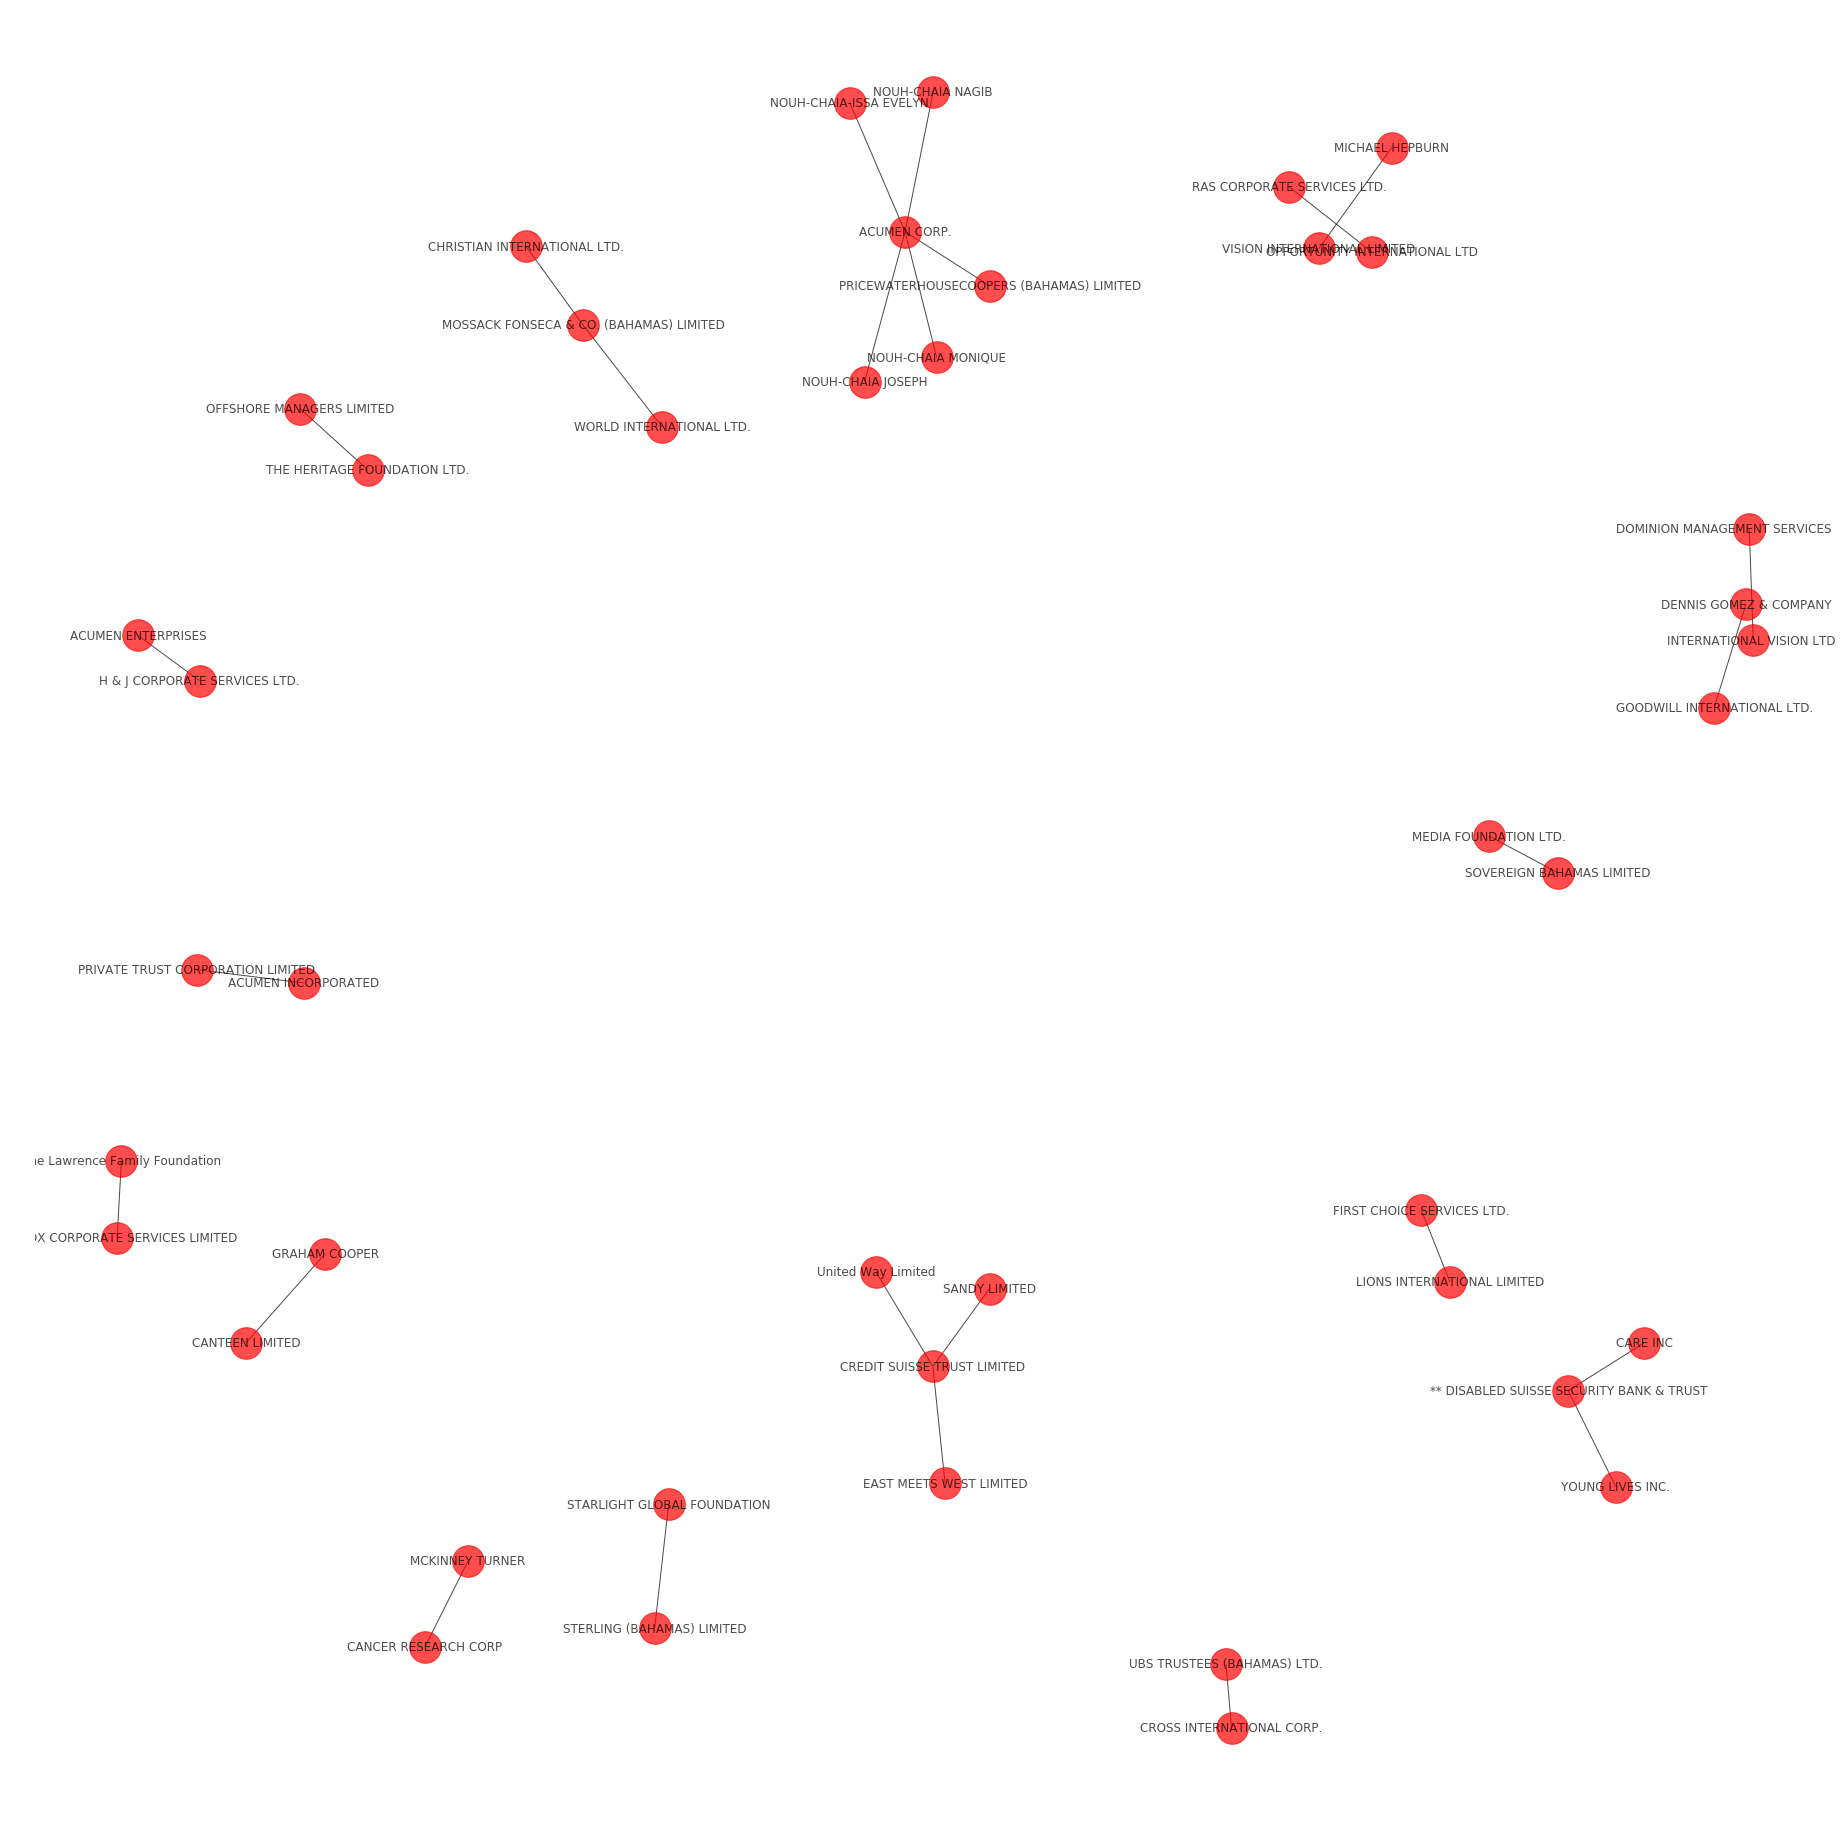

In [62]:
graph_leak_matches('bahamas')